In [1]:
# 1. Import thư viện
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
# 2. Đọc file excel và gắn index với giá Close
df = pd.read_excel('ADAUSDT.xlsx')
#df = pd.read_excel('BNBUSDT.xlsx')
#df = pd.read_excel('ETHUSDT.xlsx')
df1=df.reset_index()['Close']

In [3]:
#đảo ngược dữ liệu
df1=df1.loc[::-1].reset_index(drop=True)
df=df.loc[::-1].reset_index(drop=True)

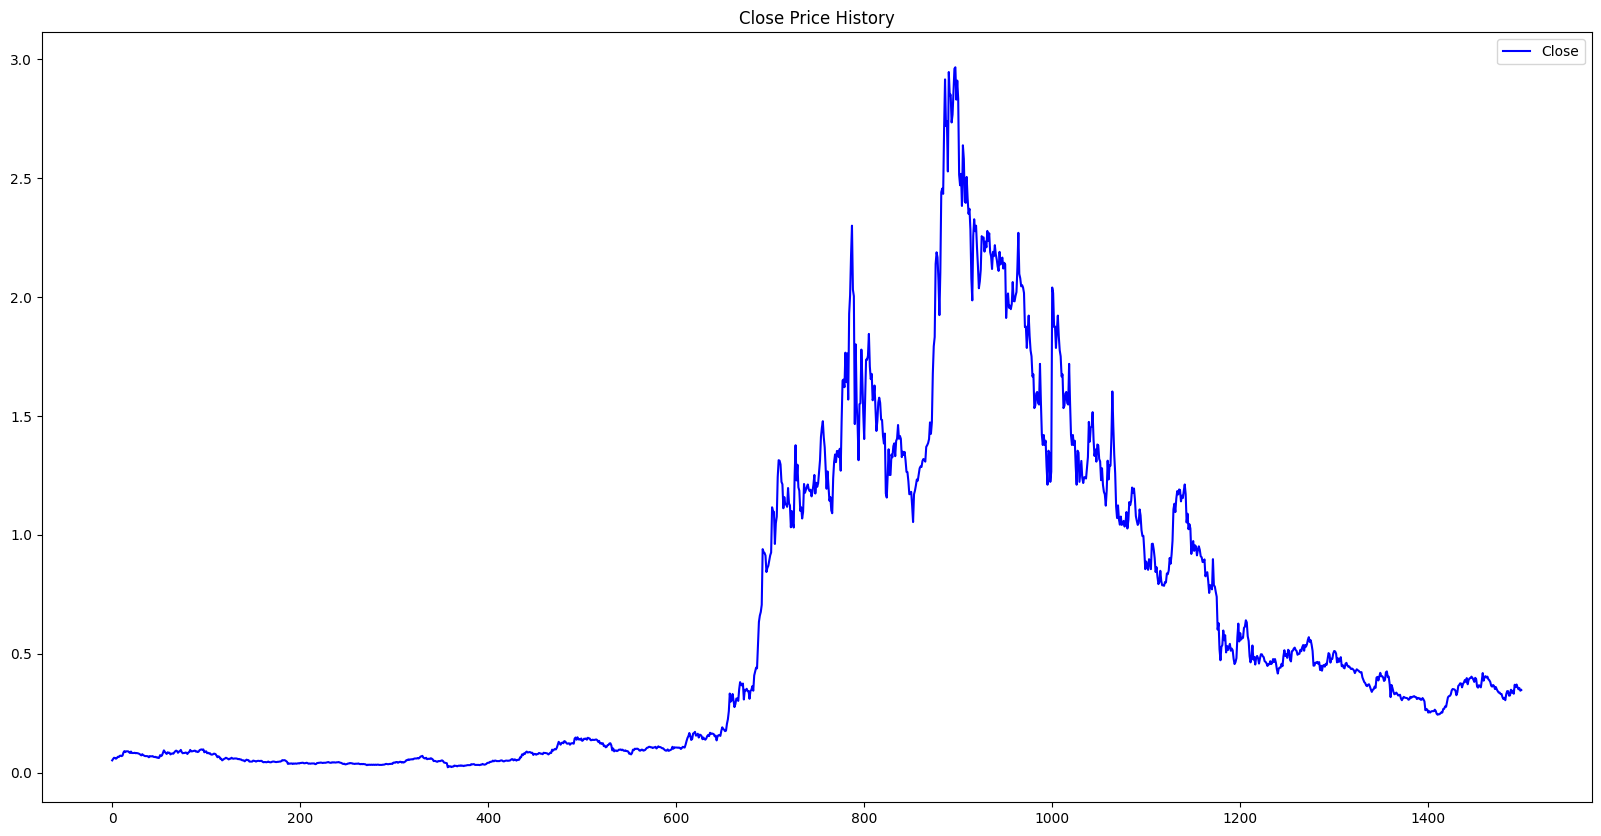

In [4]:
#vẽ biểu đồ giá đóng cửa theo thời gian
plt.figure(figsize=(20,10))
plt.plot(df.index, df['Close'], color='blue', label='Close')
plt.legend(loc='best') #tự động xác định vị trí tốt nhất để đặt chú thích
plt.title('Close Price History')
plt.show()

In [5]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [6]:
# 4. Chia train val test 7 - 1 - 2
train_size = int(0.7 * len(df1))
val_size = int(0.1 * len(df1))
test_size = len(df1) - train_size - val_size

train_data = df1[:train_size]
val_data = df1[train_size:train_size+val_size]
test_data = df1[train_size+val_size:]

In [7]:
# # 4. Chia train val test 6 - 2 - 2
# train_size = int(0.6 * len(df1))
# val_size = int(0.2 * len(df1))
# test_size = len(df1) - train_size - val_size

# train_data = df1[:train_size]
# val_data = df1[train_size:train_size+val_size]
# test_data = df1[train_size+val_size:]

Tiếp theo, ta cần tiến hành huấn luyện mô hình với thuật toán SVR. Ta có thể sử dụng GridSearchCV để tìm kiếm các tham số tối ưu cho mô hình.

In [8]:
# 5. Hàm Create Dataset
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [9]:
#6. Thiết lập tham số cho model
look_back = 30 
X_train, y_train = create_dataset(train_data, look_back)
X_val, y_val = create_dataset(val_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

In [10]:
#in thông tin kích thước của dữ liệu
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)
#in ra dòng đầu tiên của dữ liệu
print(X_train[1])
print(y_train[0])
#ta thấy dòng cuối cùng của X_train[1]=y_train[0]

(1019, 30) (1019,)
(119, 30) (119,)
(269, 30) (269,)
[0.01189263 0.01359157 0.01325178 0.01223242 0.01325178 0.01495073
 0.01461094 0.01630989 0.01664968 0.0159701  0.01664968 0.02106694
 0.02310567 0.02174652 0.02276589 0.02276589 0.02276589 0.02140673
 0.02038736 0.0224261  0.02038736 0.02038736 0.02038736 0.02072715
 0.02004757 0.02038736 0.02004757 0.01970778 0.0190282  0.01800883]
0.018008834522595992


In [11]:
#7. Xây dựng model SVR
#Khởi tạo model
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

clf = SVR()

# Thiết lập phạm vi tốt cho các tham số
C_range = np.logspace(-3, 3, 10) #tạo ra 10 giá trị trong khoảng từ 10^-3 đến 10^3
gamma_range = np.logspace(-3, 3, 10) #tạo ra 10 giá trị trong khoảng từ 10^-3 đến 10^3
kernel_range = ['rbf', 'linear', 'sigmoid'] #tạo ra 3 giá trị cho kernel

# Tạo lưới các giá trị tham số
param_grid = {'C': C_range, 'gamma': gamma_range, 'kernel': kernel_range}

# Thiết lập model với các tham số và số lượng folds cross-validation
model = GridSearchCV(clf, param_grid, refit=True, verbose=3, cv=5, scoring='neg_mean_squared_error')

#trong đó:
#clf: model
#param_grid: tham số
#refit: lưu lại model tốt nhất
#verbose: hiển thị thông tin
#cv: số lượng folds cross-validation (chọn 5 folds cross-validation)
#scoring: đánh giá model bằng MSE

#8. Huấn luyện model
model.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV 1/5] END .C=0.001, gamma=0.001, kernel=rbf;, score=-0.016 total time=   0.0s
[CV 2/5] END .C=0.001, gamma=0.001, kernel=rbf;, score=-0.017 total time=   0.0s
[CV 3/5] END .C=0.001, gamma=0.001, kernel=rbf;, score=-0.008 total time=   0.0s
[CV 4/5] END .C=0.001, gamma=0.001, kernel=rbf;, score=-0.092 total time=   0.0s


[CV 5/5] END .C=0.001, gamma=0.001, kernel=rbf;, score=-0.291 total time=   0.0s
[CV 1/5] END C=0.001, gamma=0.001, kernel=linear;, score=-0.010 total time=   0.0s
[CV 2/5] END C=0.001, gamma=0.001, kernel=linear;, score=-0.010 total time=   0.0s
[CV 3/5] END C=0.001, gamma=0.001, kernel=linear;, score=-0.008 total time=   0.0s
[CV 4/5] END C=0.001, gamma=0.001, kernel=linear;, score=-0.005 total time=   0.0s
[CV 5/5] END C=0.001, gamma=0.001, kernel=linear;, score=-0.036 total time=   0.0s
[CV 1/5] END C=0.001, gamma=0.001, kernel=sigmoid;, score=-0.016 total time=   0.0s
[CV 2/5] END C=0.001, gamma=0.001, kernel=sigmoid;, score=-0.017 total time=   0.0s
[CV 3/5] END C=0.001, gamma=0.001, kernel=sigmoid;, score=-0.008 total time=   0.0s
[CV 4/5] END C=0.001, gamma=0.001, kernel=sigmoid;, score=-0.093 total time=   0.0s
[CV 5/5] END C=0.001, gamma=0.001, kernel=sigmoid;, score=-0.292 total time=   0.0s
[CV 1/5] END C=0.001, gamma=0.004641588833612777, kernel=rbf;, score=-0.015 total ti

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'kernel': ['rbf', 'linear', 'sigmoid']},
             scoring='neg_mean_squared_error', verbose=3)

In [12]:
#In ra tham số tốt nhất
print(model.best_params_)
print(model.best_estimator_)
print(model.best_score_) #giá trị này được tính bằng cách lấy âm của MSE

{'C': 1000.0, 'gamma': 0.001, 'kernel': 'linear'}
SVR(C=1000.0, gamma=0.001, kernel='linear')
-0.0025769975541637185


In [13]:
#9. Dự báo dữ liệu test, val
y_pred_val = model.predict(X_val)
y_pred = model.predict(X_test)

In [14]:
# 10. Đánh giá độ chính xác thuật toán bằng MAE và RMSE
from sklearn.metrics import mean_absolute_error
valid_mae = mean_absolute_error(y_pred_val, y_val)
test_mae = mean_absolute_error(y_pred, y_test)

valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))

print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation MAE: 0.027849184839210638
Testing MAE: 0.024227185661508922
Validation RMSE: 0.03388314078703489
Testing RMSE: 0.025305710942905246


Sử dụng mô hình đã huấn luyện để dự đoán giá trị Close của 30 ngày tiếp theo bằng cách sử dụng phương thức predict():

Tạo tập dữ liệu giả cho các dự đoán trong tương lai

In [15]:
#Lấy ra 30 ngày cuối cùng của dữ liệu theo thứ tự thời gian của giá trị 'Close'
last_data = np.array(df['Close'].tail(look_back))
print(last_data.shape)

# Reshape last_data để có kích thước (1, lookback)
last_data = last_data.reshape((1, look_back))
future_days = 30

#tạo mảng chứa 30 ngày tiếp theo
future_pred = []

#tạo vòng lặp dự đoán 30 ngày tiếp theo
for i in range(future_days):
    # Dự đoán giá chứng khoán cho ngày tiếp theo sử dụng dữ liệu của last_data
    next_day_prediction = model.predict(last_data)[0]
    # Thêm giá dự đoán được vào mảng furture_pred
    future_pred.append(next_day_prediction)
    # Cập nhật lại last_data bằng cách bỏ giá trị đầu tiên và thêm giá dự đoán của ngày tiếp theo vào cuối mảng last_data
    last_data = np.append(last_data[:, 1:], [[next_day_prediction]], axis=1)
    last_data = last_data.reshape((1, look_back))
    print("{} day output {}".format(i, next_day_prediction))


(30,)
0 day output 0.37196506203077023
1 day output 0.439053040953243
2 day output 0.4782538787305866
3 day output 0.4942898585159155
4 day output 0.5032992378755834
5 day output 0.5156757277966362
6 day output 0.5184287332881494
7 day output 0.5105982568973131
8 day output 0.5121574486900071
9 day output 0.529761376557647
10 day output 0.5595690425273032
11 day output 0.5782385284169349
12 day output 0.590333062524226
13 day output 0.5929637136014234
14 day output 0.6132366984802529
15 day output 0.6336940877718034
16 day output 0.6420249332281882
17 day output 0.654355231645698
18 day output 0.6904503356513514
19 day output 0.7204934057303971
20 day output 0.7312621962546499
21 day output 0.7166308180403602
22 day output 0.7114059634836876
23 day output 0.7032627347243787
24 day output 0.7071761149181865
25 day output 0.7155473187963279
26 day output 0.7253595698121016
27 day output 0.7471592175356845
28 day output 0.7532633261407709
29 day output 0.7474644510684838


In [16]:
future_pred = np.array(future_pred)

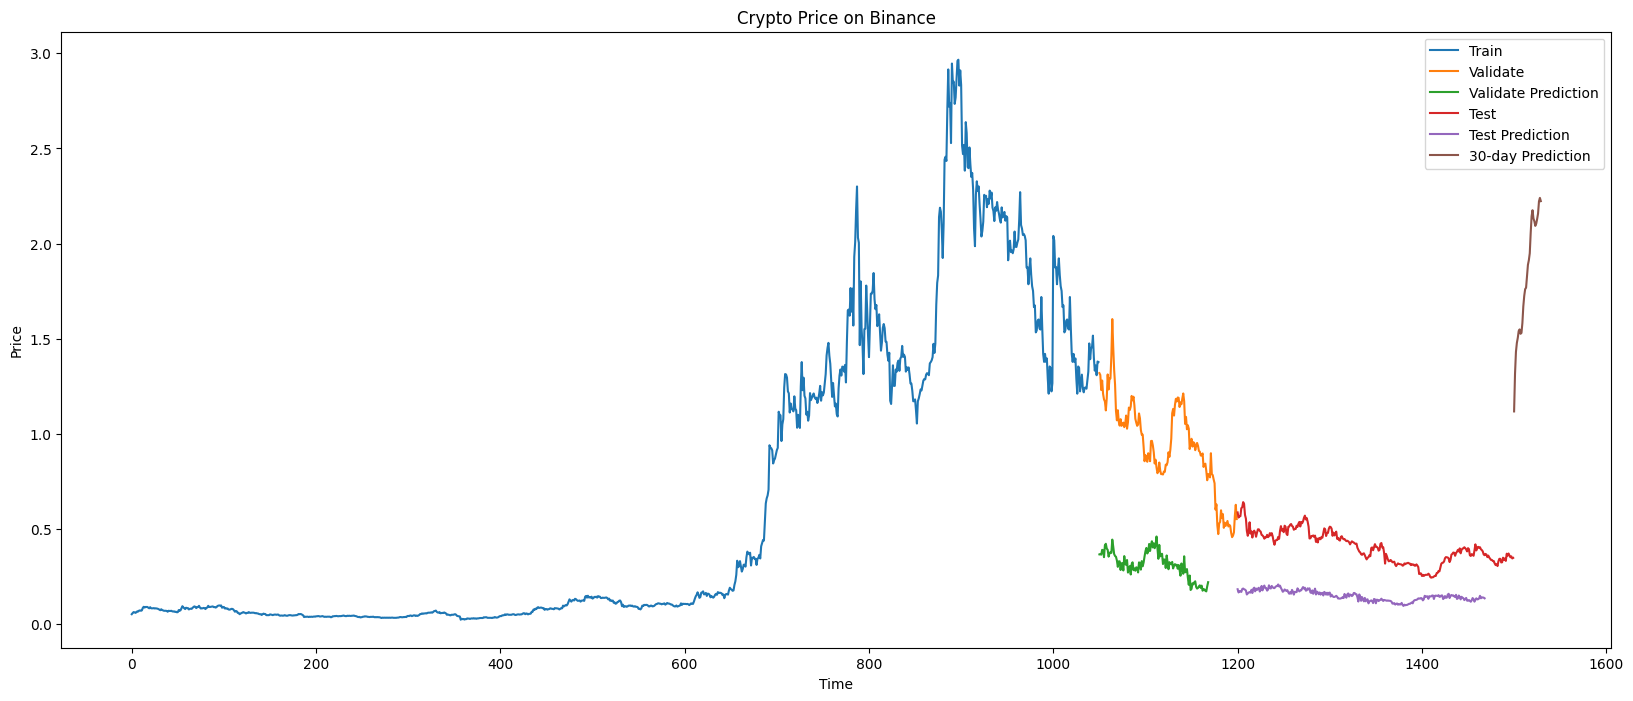

In [18]:
plt.figure(figsize=(20, 8))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data))

val_data_index = pd.RangeIndex(start=train_size, stop=train_size+val_size, step=1)
plt.plot(val_data_index, scaler.inverse_transform(val_data))

val_pred_index = pd.RangeIndex(start=train_size, stop=train_size+len(y_pred_val), step=1)
plt.plot(val_pred_index, y_pred_val)

test_data_index = pd.RangeIndex(start=train_size+val_size, stop=train_size+val_size+test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))

test_pred_index = pd.RangeIndex(start=train_size+val_size, stop=train_size+val_size+len(y_pred), step=1)
plt.plot(test_pred_index, y_pred)

future_pred_index = pd.RangeIndex(start=train_size+val_size+test_size, stop=train_size+val_size+test_size+len(future_pred), step=1)
plt.plot(future_pred_index, scaler.inverse_transform(future_pred.reshape(-1, 1)))

plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Crypto Price on Binance')
plt.legend(['Train', 'Validate', 'Validate Prediction', 'Test', 'Test Prediction', '30-day Prediction'])
plt.show()